In [3]:
try:
    import pycaret
except:
    !pip install pycaret
    import pycaret

import pandas as pd

from pycaret.classification.functional import *

In [4]:
df = pd.read_csv('../LLCP2023_clean.csv')

In [5]:
# initialize setup
s = setup(data=df, target='_MENT14D', data_split_stratify=True, normalize=True, session_id=123)

In [6]:
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:13:31
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [7]:
best

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [8]:
tuned_model = tune_model(best)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:15:33
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [9]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [10]:
predict_model(tuned_model)

,_AGEG5YR,_ASTHMS1,_BMI5CAT,_CHLDCNT,_DRDXAR2,_EDUCAG,_IMPRACE,_INCOMG1,_MICHD,_PHYS14D,...,POORHLTH,SDHSTRE1,SDLONELY,SEXVAR,_TOTINDA,_DRNKWK21,CHCSCNC,_MENT14D,prediction_label,prediction_score
4595,Age 70+,No,Normal Weight,No,Yes,College or Technical School,White,"$100,000 to < $200,00",Yes,1-13 days,...,1-13 days,Never,Rarely,Male,Yes,Yes,Yes,1-13 days,Zero days,0.8591
35849,Age 30 to 39,No,Normal Weight,Yes,No,No,White,"Less than $15,000",No,1-13 days,...,1-13 days,Usually,Sometimes,Female,Yes,No,No,1-13 days,1-13 days,0.5146
39421,Age 18 to 29,No,Normal Weight,Yes,No,Attended College,White,"$50,000 to < $100,000",No,1-13 days,...,1-13 days,Rarely,Rarely,Female,Yes,No,No,1-13 days,1-13 days,0.6782
23643,Age 30 to 39,No,Overweight,Yes,Yes,High School,White,"$50,000 to < $100,000",No,1-13 days,...,Zero days,Sometimes,Never,Female,Yes,No,No,1-13 days,1-13 days,0.5039
37712,Age 60 to 69,No,Overweight,No,No,College or Technical School,White,"$25,000 to < $35,000",No,1-13 days,...,Zero days,Sometimes,Sometimes,Male,No,Yes,No,Zero days,1-13 days,0.4923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36587,Age 50 to 59,Yes,Overweight,No,Yes,No,Other,"Less than $15,000",Yes,1-13 days,...,1-13 days,Always,Always,Female,Yes,Yes,No,14+ days,14+ days,0.5613
23298,Age 60 to 69,No,Obese,No,Yes,College or Technical School,White,"$100,000 to < $200,00",Yes,1-13 days,...,Zero days,Never,Never,Male,Yes,Yes,Yes,Zero days,Zero days,0.8750
13885,Age 70+,No,Normal Weight,No,Yes,College or Technical School,White,"$50,000 to < $100,000",No,1-13 days,...,1-13 days,Usually,Sometimes,Male,Yes,Yes,No,1-13 days,1-13 days,0.4697
17103,Age 30 to 39,No,Obese,Yes,No,College or Technical School,Other,"$35,000 to < $50,000",No,1-13 days,...,1-13 days,Rarely,Rarely,Female,Yes,Yes,No,Zero days,1-13 days,0.5975


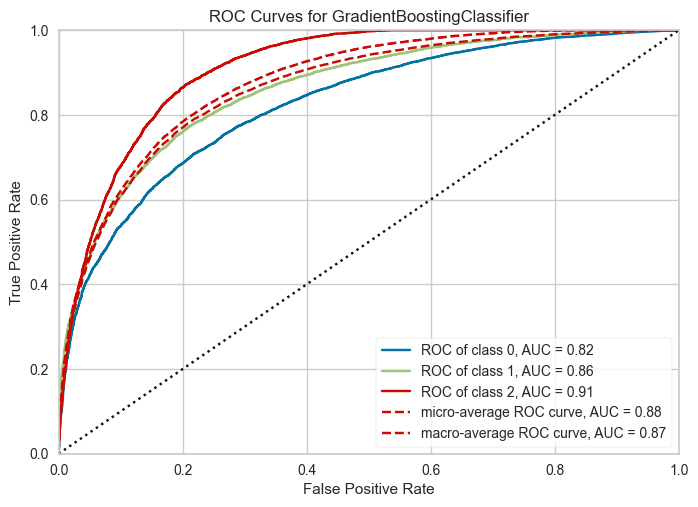

In [11]:
plot_model(tuned_model, plot = 'auc')

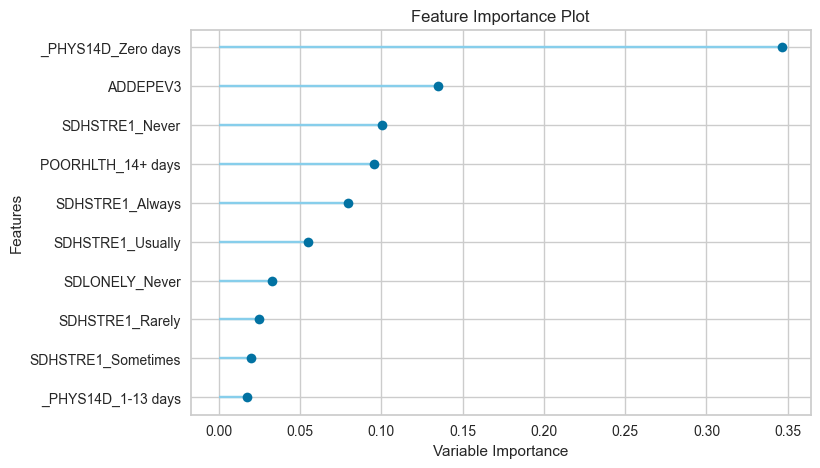

In [12]:
plot_model(tuned_model, plot='feature')

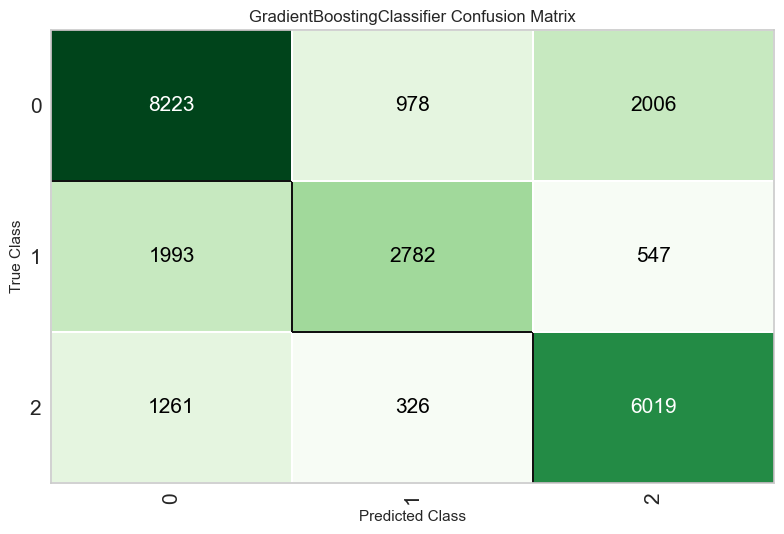

In [13]:
plot_model(tuned_model, plot='confusion_matrix')

In [14]:
predictions = predict_model(tuned_model, raw_score=True)
predictions.head()

,_AGEG5YR,_ASTHMS1,_BMI5CAT,_CHLDCNT,_DRDXAR2,_EDUCAG,_IMPRACE,_INCOMG1,_MICHD,_PHYS14D,...,SDLONELY,SEXVAR,_TOTINDA,_DRNKWK21,CHCSCNC,_MENT14D,prediction_label,prediction_score_1-13 days,prediction_score_14+ days,prediction_score_Zero days
4595,Age 70+,No,Normal Weight,No,Yes,College or Technical School,White,"$100,000 to < $200,00",Yes,1-13 days,...,Rarely,Male,Yes,Yes,Yes,1-13 days,Zero days,0.1254,0.0156,0.8591
35849,Age 30 to 39,No,Normal Weight,Yes,No,No,White,"Less than $15,000",No,1-13 days,...,Sometimes,Female,Yes,No,No,1-13 days,1-13 days,0.5146,0.3563,0.1291
39421,Age 18 to 29,No,Normal Weight,Yes,No,Attended College,White,"$50,000 to < $100,000",No,1-13 days,...,Rarely,Female,Yes,No,No,1-13 days,1-13 days,0.6782,0.0761,0.2457
23643,Age 30 to 39,No,Overweight,Yes,Yes,High School,White,"$50,000 to < $100,000",No,1-13 days,...,Never,Female,Yes,No,No,1-13 days,1-13 days,0.5039,0.1081,0.3880
37712,Age 60 to 69,No,Overweight,No,No,College or Technical School,White,"$25,000 to < $35,000",No,1-13 days,...,Sometimes,Male,No,Yes,No,Zero days,1-13 days,0.4923,0.1024,0.4053


In [19]:
save_model(tuned_model, '../model-weights/pycaret_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('...
                                             criterion='friedman_mse', init=None,
                                             learning_rate=0.1, loss=

In [16]:
# loaded_model = load_model('my_final_best_model')
# print(loaded_model)

In [17]:
rf_model = create_model('rf')
print(rf_model)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:22:28
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [18]:
xgboost_model = create_model('xgboost')
print(xgboost_model)

ValueError: Estimator xgboost not available. Please see docstring for list of available estimators.